信息时代的到来使得企业的营销焦点从产品中心转为了客户中心，为实现企业利润最大化目标。准确的对客户进行分类，根据分类结果制定个性化服务方案，优化企业营销资源分配方案。在航空营销行业中，各个航空公司通过推出更优惠的营销方式来吸引更多的客户，而通过建立合理的客户价值评估模型，对客户进行分群，分析比较不同群体的客户价值，并制定相应的营销策略，对不同的客户群提供个性化的客户服务是必须和有效的。 

本实验基于此来对收集到的某航空公司2012年至2014年的会员档案信息和其乘坐航班记录进行分析，我们将根据这些数据实现以下目标： 

1.借助航空公司客户数据，对客户进行分类。

2.对不同的客户类别进行特征分析，比较不同类客户的客户价值。 

3.对不同价值的客户类别提供个性化服务，制定相应的营销策略。

常用识别客户价值模型

本实验的目标是客户价值识别，即对客户进行分类。识别客户价值最广泛的模型是通过RFM指标来对客户进行细分，识别出高价值的客户： Recency （最近消费时间间隔 ）Frequency （消费频率 ）Monetary （消费金额 ）。在RFM模型中，消费金额表示在一段时间内，客户购买该企业产品金额的总和。但在本实验中，基于航空机票价格的多变性，同样消费金额的不同旅客对航空公司的价值是不同的。例如，一位购买长航线、低等级舱位票的旅客与一位购买短航线、高等级舱位票的旅客相比，自然是后者对于航空公司而言价值更高。 

因此，在本实验中，我们将消费金额指标使用“客户在一定时间内累积的飞行里程M”和“客户在一定时间内乘坐舱位所对应的折扣系数的平均值C”来代替。由于航空公司会员入会时间的长短在一定程度上能够影响客户价值，我们在模型中增加客户关系长度L这一个指标。 本实验将客户关系长度L、消费时间间隔R、消费频率F、飞行里程M和折扣系数的平均值C五个指标作为航空公司识别客户价值指标，记为LRFMC模型。 针对LRFMC模型，如果采用传统的属性分箱方法，即依据各个属性的平均值进行划分，对其分类，得到的分类客户群过多，提高了针对性营销的成本。并未达到利益最大化目标。因此，选取聚类算法来识别客户价值。通过对航空公司客户价值的LRFMC模型的五个指标进行K-Means聚类，识别出最有价值客户。
![](11.png)  
再来回顾一下上个实验使用的数据分析总体流程，大致修改后应用于本案例：

1）从数据中选择性抽取与新增数据抽取分别形成历史数据和增量数据。

2）对1）中抽取的数据进行数据探索分析与预处理。包括数据清洗、属性规约和变换等。

3）利用2）中形成的处理后的建模数据，基于LRFMC模型进行客户分群，对每个客户群进行特征分析，识别出有价值的客户。

4）针对模型结果得到不同价值的客户，采用不同的营销手段，提供定制化服务。

### 数据抽取
对于航空公司抽取的以2014-03-31为结束时间的数据中，抽取所含客户基本信息、乘机信息以及积分信息等详细数据，总含有62 988条记录。 我们将数据的总共数据间隔视为分析观测窗口，在窗口的所有数据即源数据。其中包含了会员卡号、入会时间、性别、年龄、会员卡级别、工作地城市、工作地所在省份、工作地所在国家、观测窗口结束时间、观测窗口乘机积分、飞行公里数、飞行次数、飞行时间、成绩时间间隔和平均折扣率等44个属性。

### 数据分析  
对于原始数据，我们总要进行探索分析，即对数据进行缺失值分析和异常分析，分析出数据的规律以及异常值。 在我们的数据中，通过观察发现部分票价属性为空，或者有票价最小值为0、折扣率最小值为0、总飞行公里数却大于0的记录。票价为空值的数据可能是客户不存在乘机记录造成的，而其他的数据是客户乘坐0折机票或者积分兑换产生的。 如何处理这些数据，取决于其在总数据中占的比重有多大。 首先来查找每列属性观测值中空值个数、最大值、最小值等。代码如下：

In [2]:
!tar -xzf flight.tar.gz

In [1]:
#对数据进行基本的探索
#返回缺失值个数以及最大最小值
import pandas as pd

In [2]:
datafile= './air_data.csv' #航空原始数据,第一行为属性标签
resultfile = './explore.csv' #数据探索结果表

data = pd.read_csv(datafile, encoding = 'utf-8') #读取原始数据，指定UTF-8编码（需要用文本编辑器将数据装换为UTF-8编码）

In [3]:
explore = data.describe(percentiles = [], include = 'all').T #包括对数据的基本描述，percentiles参数是指定计算多少的分位数表（如1/4分位数、中位数等）；T是转置，转置后更方便查阅
explore['null'] = len(data)-explore['count'] #describe()函数自动计算非空值数，需要手动计算空值数
explore = explore[['null', 'max', 'min']]
explore.columns = [u'空值数', u'最大值', u'最小值'] #表头重命名

In [4]:
'''这里只选取部分探索结果。
describe()函数自动计算的字段有count（非空值数）、unique（唯一值数）、top（频数最高者）、freq（最高频数）、mean（平均值）、std（方差）、min（最小值）、50%（中位数）、max（最大值）'''
explore.to_csv(resultfile) #导出结果

根据上面的代码得到的探索结果如下表中数据：  
![](12.png)

## 数据预处理

本案例主要采用数据清洗、属性规约与数据变换的预处理方法。

由于基于LRMFC模型来对客户进行分群，我们需要将这44个属性进行筛选变换规则，来组成我们需要的指标列表。 而对于数据中的空值，我们则需要对其进行数据清洗。

### 数据预处理——数据清洗

通过上一小节中的数据探索分析，发现数据中确实存在缺失值，且票价最小值为0、折扣率最小值为0、总飞行公里数却大于0的记录。但通过观察发现，这部分数据所占比例较小，对于问题影响不大，因此对其进行丢弃处理。具体的处理方法如下： 

1.丢弃票价为空的记录。

2.丢弃票价最小值为0、折扣率最小值为0、总飞行公里数却大于0的记录。

使用pandas对满足清洗条件的数据进行丢弃，即该行数据全部丢弃。添加代码如下：

In [5]:
datafile= './air_data.csv' #航空原始数据,第一行为属性标签
cleanedfile = './data_cleaned.csv' #数据清洗后保存的文件

In [6]:
data = pd.read_csv(datafile,encoding='utf-8') #读取原始数据，指定UTF-8编码（需要用文本编辑器将数据装换为UTF-8编码）

#票价非空值才保留
data = data[data['SUM_YR_1'].notnull()&data['SUM_YR_2'].notnull()]

#只保留票价非零的，或者平均折扣率与总飞行公里数同时为0的记录。
index1 = data['SUM_YR_1'] != 0
index2 = data['SUM_YR_2'] != 0
index3 = (data['SEG_KM_SUM'] == 0) & (data['avg_discount'] == 0) #该规则是“与”
data = data[index1 | index2 | index3] #该规则是“或”

data.to_csv(cleanedfile) #导出结果,由于excel读取csv文件使用ansi编码

对于处理后的数据，可以打开./fight/data_cleaned.csv文件查看，此时已将满足清洗条件的数据丢弃：
![](13.png)

### 数据预处理——属性规约

原始数据中属性太多，根据航空公司客户价值LRFMC模型，只需选择与LRMFC指标相关的6个属性：FFP_DATE、LOAD_TIME、FLIGHT_COUNT、AVG_DISCOUNT、SEG_KM_SUM、LAST_TO_END。即入会时间、观测窗口结束时间、观测窗口的飞行次数、平均折扣率、观测窗口的总飞行公里数、最后一次乘机时间至观测窗口末端时长。删除与其不相干、弱相关或冗余的属性。经过属性选择后的数据集。添加如下代码：

In [7]:
outfile = './data_stipu.csv'
df = data[['FFP_DATE','LOAD_TIME','avg_discount','FLIGHT_COUNT','SEG_KM_SUM','LAST_TO_END']]
df.to_csv(outfile)

规约后的数据格式如下：  
![](14.png)

### 数据预处理——数据变换

数据变换是将数据转换成适当的格式。本实验数据依据LRFMC五个指标，对原始数据进行提取。 具体计算方式如下： 

（1） L = LOAD_TIME - FFP_DATE 

会员入会时间距观测窗口结束的月数 = 观测窗口的结束时间 - 入会时间 [单位：月] 

（2） R = LAST_TO_END

 客户最近一次乘坐公司飞机距观测窗口结束的月数 = 最后一次乘机时间至观测窗口末端时长 [单位：月] 

（3） F = FLIGHT_COUNT 

客户在观测窗口内乘坐公司飞机的次数 = 观测窗口的飞行次数 [单位：次] 

（4） M = SEG_KM_SUM

客户在观测时间内在公司累计的飞行里程 = 观测窗口的总飞行公里数 [单位：公里]

 （5） C = AVG_DISCOUNT

 客户在观测时间内乘坐舱位所对应的折扣系数的平均值 = 平均折扣率 [单位：无] 

将5个指标数据提取之后，对每个指标数据分布情况进行分析，可以观察到，5个指标的取值范围数据差异较大，为了消除数量级数据带来的影响，需要对数据进行标准化处理。 本实验我们采用标准差来对数据进行标准化处理,标准差标准化处理后，形成ZL,ZR,ZF,ZM,ZC5个属性的数据。  
   
添加如下代码：

In [8]:
datafile = './data_stipu.csv'
standrandfile = './data_stand.csv'

data = pd.read_csv(datafile)

#数据变换
df = data[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']].copy()#数据副本的复制
df['L'] = (pd.to_datetime(data['LOAD_TIME']) - pd.to_datetime(data['FFP_DATE'])).dt.days/30#计算日期差,单位为月
df.rename(columns={'LAST_TO_END':'R','FLIGHT_COUNT':'F','SEG_KM_SUM':'M','avg_discount':'C'},inplace = True)#列名重命名

#数据标准化
df = (df - df.mean(axis=0))/(df.std(axis=0))#均值标准化
df.columns = ['z'+i for i in df.columns]#对数据列名重命名

df.to_csv(standrandfile)

标准化后的数据格式如下：  
![1](15.png)

### 模型构建——聚类

对于客户价值分析模型构建主要分为两个部分： 

1.根据LRFMC模型的5个指标的数据，对客户进行聚类分群。

2.结合业务对每个客户群进行特征分析，分析其客户价值，并对客户群进行价值排名。

### 客户聚类

本实验采用K-means聚类算法对客户数据进行客户分群，聚类的个数需要结合具体业务来确定。在本实验中由于指标个数，将客户聚成5类。

 K-Means算法使用sklearn库来实现。   
 
 添加如下代码：

In [9]:
from sklearn.cluster import KMeans #导入K均值聚类算法
import numpy as np

np.set_printoptions(threshold=np.inf)

inputfile = './data_stand.csv' #待聚类的数据文件
k = 5                    #需要进行的聚类类别数

#读取数据并进行聚类分析
data = pd.read_csv(inputfile).drop(['Unnamed: 0'],axis=1) #读取数据

In [13]:
#调用k-means算法，进行聚类分析
kmodel = KMeans(n_clusters = k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, copy_x=True,algorithm="elkan")
#n_jobs是并行数，一般等于CPU数较好
kmodel.fit(data) #训练模型

print(kmodel.cluster_centers_) #查看聚类中心

[[-0.41507807 -0.16073418 -0.16045348 -0.2576155  -0.70028934]
 [-0.79940021  2.4831749   2.42445945  0.30923797  0.4836574 ]
 [-0.00302366 -0.23095477 -0.23547529  2.17311437  0.04332452]
 [ 1.68682327 -0.57391382 -0.5367476  -0.17484976 -0.31321639]
 [-0.37743534 -0.08663489 -0.09454128 -0.15689175  1.16093248]]


运行后可以看到我们的聚类中心结果：

其列对应ZR、ZF、ZM、ZC、ZL指标。

我们可以看到通过使用聚类算法对客户进行聚类分群的结果。但由于K-Means聚类算法是随机选择类标号，故重复实验时得到的结果可能与上述结果有些出入。另外，由于算法的精度问题，重复实验得到的聚类中心也略有不同。

### 模型评价

针对聚类结果，我们使用雷达图使得聚类结果可视化，更加直观的分析各个用户群的特征。  

添加如下代码：

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

labels = data.columns #标签
labels = labels.append(pd.Index([data.columns[0]])) #添加多 第一个标签
k = 5 #数据个数

plot_data = kmodel.cluster_centers_
color = ['b', 'g', 'r', 'c', 'y'] #指定颜色

In [36]:
angles = np.linspace(0, 2*np.pi, k, endpoint=False)
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) # 闭合
angles = np.concatenate((angles, [angles[0]])) # 闭合

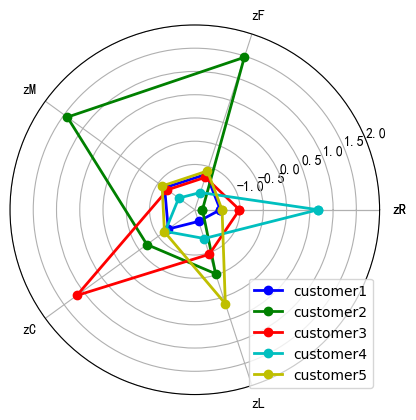

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True) #polar参数！！

# labels = data.columns
for i in range(len(plot_data)):
  ax.plot(angles, plot_data[i], 'o-', color = color[i], label = u'customer'+str(i+1), linewidth=2)# 画线
ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5), fontproperties="SimHei")
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")

plt.legend(loc = 4)
plt.show()

接下来，我们针对可视化结果对数据特征进行分析。其中，客户群1在R上属性最大，在F、M上属性最小；客户群2在C上属性最大；客户群3在F、M属性上最大，在R属性上最小；客户群4在L、R属性上最小；客户群5在L属性上最大。结合业务分析，通过比较各个指标在群间的大小对某一个群的特征进行评价分析。 

对于LRMFC模型，其L\M\F\C指标越大越好，R指标越小越好，我们根据聚类中心结果来对各个客户群进行特征划分。依此找出每个特征对应的最大值、最小值、次大值、次小值。

|  客户群编号|  优势特征| 劣势特征|
|--|--|--|
|  客户群1|  | RFM|
|客户群2|C|RFM|
|客户群3|FMR| |
|客户群4|-|LC|
|客户群5|LFM| |  

【注】正常体为最大值，加粗体为次大值，斜体为最小值，下划线为次小值。

由上述的特征分析图表说明每个客户群都有显著不同的表现特征，基于该特征描述，本实验案例中定义五个等级的客户类别：重要保持客户、重要发展客户、重要挽留客户、一般客户、低价值客户。其中每种客户类别的具体特征如下：  
- **保持客户** 这类客户的平均折扣率C较高，一般所乘坐的舱位等级较高，最近乘坐过本公司航班R低、乘坐的次数F或里程M较高。这些客户对于航空公司来说是高价值客户，相对来说所占的比例也偏小。航空公司应该优先将资源投放到他们呢身上，对他们进行差异化管理和一对一影响，提供这类用户的忠诚度与满意度，延长这类客户的高水平消费。  

- **重要发展客户**：这类客户的平均折扣率C较高，最近乘坐过本公司航班R低，但乘坐次数F或乘坐里程M较低。这类客户入会时间L短，他们是航空公司的潜在 价值客户。虽然这类客户目前的价值不是很高，但有很大的发展潜力。航空公司应努力促使这类客户增加在本公司的乘机消费和合作伙伴处的消费，增加客户的钱包份额。通过客户价值的提升，加强这类客户的满意度，提高他们转向竞争对手的转移成本，使他们逐渐称为公司的忠诚客户。

- **重要挽留客户**：这类客户过去所乘航班的平均折扣率C、乘坐次数F或者里程数M较高，但已经较长时间没有乘坐本公司的航班R高或者使乘坐频率变小。他们的客户价值变化的不确定性很高。由于这些客户衰退的原因各不相同，所以掌握客户的最新信息、维持与客户的互动就显得尤为重要。航空公司应该根据这些客户的最近消费时间、消费次数的变化情况、推测客户消费的异动状况，并列出客户名单。对其采取一定的营销手段，延长客户的生命周期。

- **一般与低价值客户**：这类客户所乘航班的平均折扣率C很低，较长时间没有乘坐过本公司航班R高，乘坐次数F或者里程M较低，入会时间L短。这些客户的价值较低，可能是在航空公司机票打折促销时，才会乘坐本公司航班。  

根据特征定义我们可以将客户群分类：

**客户群1**，R为最大值，FM为最小值。可见这类客户最近乘机次数少，里程也较小。故为一般客户。 

**客户群2**，C值最大，R次大，FM为次小值。可见这类客户最近乘机次数少，但其折扣率较大，成绩次数和里程也偏小。故为重要发展客户。 

**客户群3**，F,M为最大值，R为最小值。完全符合重要保持客户。 

**客户群4**，L,C为最小值，即入会时间短，且折扣率小。应归属到低价值客户。 

**客户群5**，L为最大值，F,M为次大值。这类客户入会时间长，乘机次数和总里程偏大，最近乘机时间并未表现明显增加。故为重要挽留客户。

对客户进行特征划分后，针对不同类型的客户群提供不同的产品和服务，提升重要发展客户的价值、稳定和延长重要保持客户的高水平消费、防范重要挽留客户的流失并积极进行关系恢复。

### 实验总结

本实验结合航空公司客户价值分析的案例，重点介绍了数据挖掘算法中K-means聚类算法在实际案例中的应用。针对客户价值识别传统的RFM模型的不足，本实验使用了LRFMC模型来实现客户价值分析。

通过本实验，学生应该达到以下目标：

1. 学会使用Pands对数据进行分析处理       

2. 能够实现K-means聚类算法